In [1]:
%%writefile camera.py
import time

import cv2

pic_num = 30
root = ("../face_pic/")
bool_break = 0
#웹캠에서 영상을 읽어온다
cap = cv2.VideoCapture(0)
cap.set(3, 640) #WIDTH
cap.set(4, 480) #HEIGHT

#얼굴 인식 캐스케이드 파일 읽는다
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
i = 0
while(True):
    # frame 별로 capture 한다
    ret, frame = cap.read()
    faces = face_cascade.detectMultiScale(frame, 1.3, 5)
    frame_c = frame.copy()
    # 인식된 얼굴에 사각형을 출력한다
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x-40,y-40),(x+w+40,y+h+40),(255,0,0),2)
        # cropping & save
        face = frame_c[y-30:y+h+30,x-30:x+w+30]
        cv2.imwrite(root+str(i)+".jpg",face)
        i += 1
        time.sleep(0.5)
        if i == pic_num:
            bool_break = 1
            break        
    cv2.imshow('frame',frame)
    if bool_break == 1:
        break
    
    if cv2.waitKey(100) & 0xFF == ord('q'):               
        break
    
cap.release()
cv2.destroyAllWindows()


In [1]:
from keras import models
from keras import layers
from keras.applications import VGG16

Using TensorFlow backend.


In [24]:
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape =(200,200,3))

58892288/58889256 [==============================] - 13s 0us/step


In [28]:
face_recogn = models.Sequential()
# face_recogn.add(layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)))
# face_recogn.add(layers.MaxPooling2D((2,2)))
# face_recogn.add(layers.Conv2D(32,(3,3),activation='relu'))
# face_recogn.add(layers.MaxPooling2D((2,2)))                
# face_recogn.add(layers.Conv2D(64,(3,3),activation='relu'))
# face_recogn.add(layers.MaxPooling2D((2,2)))                
face_recogn.add(conv_base)
face_recogn.add(layers.Flatten())
face_recogn.add(layers.Dense(64,activation='relu'))
face_recogn.add(layers.Dense(32,activation='relu'))
face_recogn.add(layers.Dense(3,activation='softmax'))

In [29]:
face_recogn.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['acc'])

face_recogn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 99        
Total params: 15,896,579
Trainable params: 15,896,579
Non-trainable params: 0
_________________________________________________________________


In [22]:
pic_root = ("../face_pic/")

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range = 15, horizontal_flip=True)
# test_datagem = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(pic_root,target_size=(200,200),batch_size=16,interpolation="bilinear")
# test_generator = train_datagen.flow_from_directory(test_root,target_size=(200,200,3),batch_size=16,interpolation="bilinear")

Found 87 images belonging to 3 classes.


In [7]:
import matplotlib.pyplot as plt

Found 87 images belonging to 3 classes.


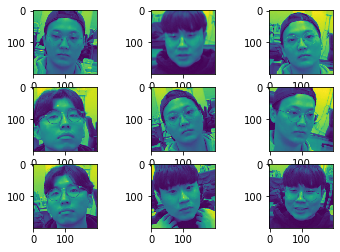

In [23]:
i = 0
for x_batch, y_batch in train_datagen.flow_from_directory(pic_root,target_size=(200,200),batch_size=16,color_mode='grayscale'):
    while i < 9:
        plt.subplot(330+1+i)
        plt.imshow(x_batch[i].reshape(200, 200))
        i += 1
    break
    
plt.show()

In [31]:
first = face_recogn.fit_generator(train_generator,steps_per_epoch=10,epochs=10)

Epoch 1/10
10/10 [==============================] - 172s 17s/step - loss: 1.2936 - acc: 0.3803
Epoch 2/10
10/10 [==============================] - 174s 17s/step - loss: 1.2407 - acc: 0.3732
Epoch 3/10
10/10 [==============================] - 182s 18s/step - loss: 2.7440 - acc: 0.5033
Epoch 4/10
10/10 [==============================] - 171s 17s/step - loss: 1.2154 - acc: 0.3380
Epoch 5/10
10/10 [==============================] - 181s 18s/step - loss: 1.0910 - acc: 0.4106
Epoch 6/10
 2/10 [=====>........................] - ETA: 2:36 - loss: 2.1799 - acc: 0.2500

KeyboardInterrupt: 